In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

### Taylor's method (Order 2)
\begin{align}
u_{i+1} = u_i + h(f(t_i, u_i) + \frac{1}{2}hf'(t_i, u_i))
\end{align}
### Taylor's method (Order 4)
\begin{align}
u_{i+1} = u_i + h(f(t_i, u_i) + \frac{1}{2}h(f'(t_i, u_i) + \frac{1}{3}h(f^{(2)}(t_i,u_i) + \frac{1}{4}hf^{(3)}(t_i, u_i))))
\end{align}

In [9]:
def taylor_order2(f, f1, a, b, x0, n):
    u = np.zeros((n + 1, 2))
    h = (b - a)/n

    u[:, 0] = np.linspace(a, b, n + 1)
    u[0] = [a, x0]
    for k in range(n):
        tk, uk = u[k, 0], u[k, 1]
        u[k + 1, 1] = uk + h*(f(tk, uk) + 0.5*h*f1(tk, uk))
    return u

def taylor_order4(f, f1, f2, f3, a, b, x0, n):
    """
    fn = n-th derivative respect to t of f(t, u)
    """
    u = np.zeros((n + 1, 2))
    h = (b - a)/n

    u[:, 0] = np.linspace(a, b, n + 1)
    u[0] = [a, x0]
    for k in range(n):
        tk, uk = u[k, 0], u[k, 1]
        u[k + 1, 1] = uk + h*(f(tk, uk)+1/2*h*(f1(tk, uk)+1/3*h*(f2(tk, uk)+1/4*h*f3(tk, uk))))
    return u

#### Zapateiro Example 6.2.2 page 250 (Observation: If it matches) 

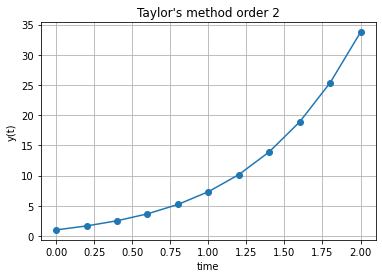

Taylor's method


,t[k],u[k],y(t[k]),error
0,0.0,1.00000000000,1.00000000000,0.00000000000
1,0.2,1.66000000000,1.67262482344,0.01262482344
2,0.4,2.51560000000,2.54642227877,0.03082227877
3,0.6,3.66263200000,3.71906920351,0.05643720351
4,0.8,5.21801104000,5.30986835643,0.09185731643
5,1.0,7.32437346880,7.46453645613,0.14016298733
6,1.2,10.15573563194,10.36105230463,0.20531667269
7,1.4,13.92439747096,14.21679970160,0.29240223064
8,1.6,18.88936491457,19.29729181956,0.40792690498
9,1.8,25.36662519578,25.92682717972,0.56020198394


In [15]:
def f(t, y):
    return y + 3*t**2 + 2

def f1(t, y):
    return y + 3*t**2 + 2 + 6*t 
    
def y(t):
    return -3*t**2 - 6*t - 8 + 9*math.e**t

a = 0
b = 2
x0 = 1
n = 10

h = (b - a)/n

# vectores
u = taylor_order2(f, f1, a, b, x0, n)

# add exact h(t) to u = [t, u(t)]
h_points = np.array([y(i) for i in u[:, 0]]).reshape(-1, 1)
u = np.append(u, h_points, axis=1)

# add error to u = [t, u(t), h(t)]
error = np.abs(u[:, 1] - u[:, 2]).reshape(-1, 1)
u = np.append(u, error, axis=1)

# plot
plt.plot(u[:, 0], u[:, 1], linestyle='-', marker='o')
plt.ylabel("y(t)")
plt.xlabel("time")
plt.title("Taylor's method order 2")
plt.grid(True)
plt.show()

# print
print("Taylor's method")
pd.set_option("display.precision", 11)
pd.DataFrame(u, range(len(u[:, 0])), ["t[k]", "u[k]", "y(t[k])", "error"])

#### Zapateiro Example 6.2.2 page 250 (Observation: If it matches) 

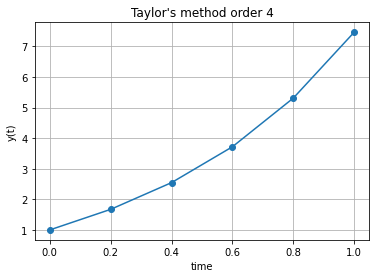

Taylor's method


,t[k],u[k],y(t[k]),error
0,0.0,1.00000000000,1.00000000000,0.00000000000
1,0.2,1.67260000000,1.67262482344,0.00002482344
2,0.4,2.54636164000,2.54642227877,0.00006063877
3,0.6,3.71895810710,3.71906920351,0.00011109642
4,0.8,5.30968743201,5.30986835643,0.00018092443
5,1.0,7.46426022945,7.46453645613,0.00027622668


In [17]:
def f(t, y):
    return y + 3*t**2 + 2

def f1(t, y):
    return y + 3*t**2 + 2 + 6*t

def f2(t, y):
    return y + 3*t**2 + 6*t + 8

def f3(t, y):
    return y + 3*t**2 + 6*t + 8
    
def y(t):
    return -3*t**2 - 6*t - 8 + 9*math.e**t

a = 0
b = 1
x0 = 1
n = 5

h = (b - a)/n

# vectores
u = taylor_order4(f, f1, f2, f3, a, b, x0, n)

# add exact h(t) to u = [t, u(t)]
h_points = np.array([y(i) for i in u[:, 0]]).reshape(-1, 1)
u = np.append(u, h_points, axis=1)

# add error to u = [t, u(t), h(t)]
error = np.abs(u[:, 1] - u[:, 2]).reshape(-1, 1)
u = np.append(u, error, axis=1)

# graphic
plt.plot(u[:, 0], u[:, 1], linestyle='-', marker='o')
plt.ylabel("y(t)")
plt.xlabel("time")
plt.title("Taylor's method order 4")
plt.grid(True)
plt.show()

# print
print("Taylor's method")
pd.set_option("display.precision", 11)
pd.DataFrame(u, range(len(u[:, 0])), ["t[k]", "u[k]", "y(t[k])", "error"])